In [48]:
!git clone https://github.com/FabioCavaleti/Enefit-Predict-Energy-Behavior-of-Prosumers.git

fatal: destination path 'Enefit-Predict-Energy-Behavior-of-Prosumers' already exists and is not an empty directory.


In [49]:
!cd Enefit-Predict-Energy-Behavior-of-Prosumers

In [50]:
!pip install dash

Exception ignored in: <function _releaseLock at 0x7b77be7158a0>
Traceback (most recent call last):
  File "/home/fcavaleti*/anaconda3/envs/data/lib/python3.12/logging/__init__.py", line 243, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

import dash
from dash import dcc
from dash import html

In [ ]:
df_client = pd.read_csv('Enefit-Predict-Energy-Behavior-of-Prosumers/predict-energy-behavior-of-prosumers/client.csv')
df_eletricity_prices = pd.read_csv('Enefit-Predict-Energy-Behavior-of-Prosumers/predict-energy-behavior-of-prosumers/electricity_prices.csv')
df_forecast_weather = pd.read_csv('Enefit-Predict-Energy-Behavior-of-Prosumers/predict-energy-behavior-of-prosumers/forecast_weather.csv')
df_gas_prices = pd.read_csv('Enefit-Predict-Energy-Behavior-of-Prosumers/predict-energy-behavior-of-prosumers/gas_prices.csv')
df_historical_weather = pd.read_csv('Enefit-Predict-Energy-Behavior-of-Prosumers/predict-energy-behavior-of-prosumers/historical_weather.csv')

In [ ]:
# Verificando a existência de duplicatas

print('Duplicatas em df_client:', df_client.duplicated().sum())
print('Duplicatas em df_eletricity_prices:', df_eletricity_prices.duplicated().sum())
print('Duplicatas em df_forecast_weather:', df_forecast_weather.duplicated().sum())
print('Duplicatas em df_gas_prices:', df_gas_prices.duplicated().sum())
print('Duplicatas em df_historical_weather:', df_historical_weather.duplicated().sum())


Duplicatas em df_client: 0
Duplicatas em df_eletricity_prices: 0


KeyboardInterrupt: 

In [ ]:
# Verificando a existência de valore nulos

print("Valores nulos em df_client:\n", df_client.isnull().sum())
print("\n\n")
print("Valores nulos em df_eletricity_prices:\n", df_eletricity_prices.isnull().sum())
print("\n\n")
print("Valores nulos em df_forecast_weather:\n", df_forecast_weather.isnull().sum())
print("\n\n")
print("Valores nulos em df_gas_prices:\n", df_gas_prices.isnull().sum())
print("\n\n")
print("Valores nulos em df_historical_weather:\n", df_historical_weather.isnull().sum())


Valores nulos em df_client:
 product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64



Valores nulos em df_eletricity_prices:
 forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64



Valores nulos em df_forecast_weather:
 latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwar

In [ ]:
df_forecast_weather.shape
# Mostrando linhas nulas de df_forecast_weather

df_forecast_weather[df_forecast_weather.isnull().any(axis=1)]

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
1849670,59.7,23.7,2022-08-11 02:00:00,3,19.043604,16.849023,0.908295,0.0,0.0,0.908295,5.913838,7.620130,345,2022-08-11 05:00:00,17.096667,NaN,0.0,0.0
1849782,59.7,23.7,2022-08-11 02:00:00,4,18.796777,16.994287,0.844788,0.0,0.0,0.844788,5.421923,8.103373,345,2022-08-11 06:00:00,206.413750,NaN,0.0,0.0


In [ ]:
df_historical_weather.head()
df_historical_weather = df_historical_weather.drop(columns=["dewpoint"])

In [ ]:
df_gas_prices = df_gas_prices.rename(columns={"lowest_price_per_mwh" : "gas_lowest_price", "highest_price_per_mwh": "gas_highest_price"})
df_gas_prices = df_gas_prices.drop(columns=["forecast_date", "origin_date"]) #drop para remover duplicatas apos join em data_block_id
df_gas_prices.head()

,gas_lowest_price,gas_highest_price,data_block_id
0,45.23,46.32,1
1,45.62,46.29,2
2,45.85,46.40,3
3,46.30,46.80,4
4,46.30,46.58,5


In [ ]:
df_forecast_weather.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [ ]:
df_eletricity_prices = df_eletricity_prices.rename(columns={"euros_per_mwh" : "eletricity_prices"})
df_eletricity_prices.head()

,forecast_date,eletricity_prices,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [ ]:
df = df_forecast_weather
df = df.drop(columns=["data_block_id"])
df = df.merge(df_eletricity_prices, left_on="forecast_datetime", right_on="forecast_date", how="left")
df = df.drop(columns=["origin_date", "dewpoint", "hours_ahead", "origin_datetime"])
df = df.merge(df_gas_prices, on="data_block_id", how="left")
df.head()

,latitude,longitude,temperature,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,forecast_date,eletricity_prices,data_block_id,gas_lowest_price,gas_highest_price
0,57.6,21.7,15.655786,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,2021-09-01 03:00:00,0.0,0.0,0.0,0.0,2021-09-01 03:00:00,86.88,1.0,45.23,46.32
1,57.6,22.2,13.003931,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,2021-09-01 03:00:00,0.0,0.0,0.0,0.0,2021-09-01 03:00:00,86.88,1.0,45.23,46.32
2,57.6,22.7,14.206567,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,2021-09-01 03:00:00,0.0,0.0,0.0,0.0,2021-09-01 03:00:00,86.88,1.0,45.23,46.32
3,57.6,23.2,14.844507,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,2021-09-01 03:00:00,0.0,0.0,0.0,0.0,2021-09-01 03:00:00,86.88,1.0,45.23,46.32
4,57.6,23.7,15.293848,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,2021-09-01 03:00:00,0.0,0.0,0.0,0.0,2021-09-01 03:00:00,86.88,1.0,45.23,46.32


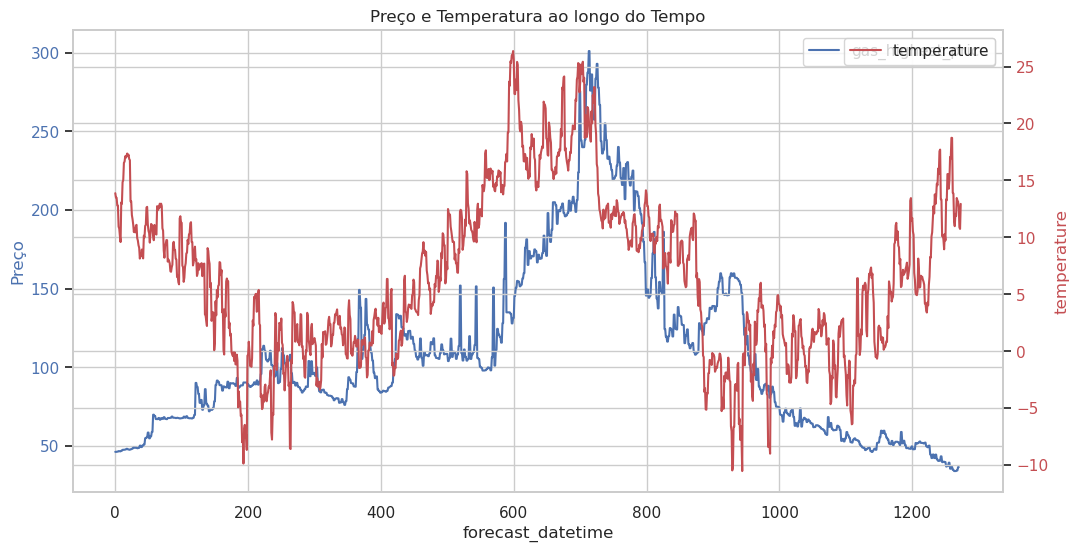

In [ ]:
# Representação preço por condições climaticas
# Pametros da visualização
latitute = 57.6
longitute = 22.2
tipo_cc = 'temperature' #temperature,
tipo_preco = 'gas_highest_price' #eletricity_prices, gas_lowest_price, gas_highest_price

#modificação do dataset para visualização
df_vis1 = df[[tipo_cc, tipo_preco, "latitude", "longitude", "forecast_datetime"]]
df_vis1 = df_vis1[(df_vis1['latitude'] == latitute) & (df_vis1['longitude'] == longitute)]
vis1 = df_vis1[["forecast_datetime", tipo_cc, tipo_preco]].to_numpy()
aux = []

# transformando as horas em media da temperatura diária
n = 24
for i in range(0, int(vis1.shape[0]/n)):
  sum_cc = 0
  sum_preco = 0
  for j in range(n):
    sum_cc += vis1[i*n+j][1]
    sum_preco += vis1[i*n+j][2]
  aux.append([i, sum_cc/n, sum_preco/n])

df_vis1 = pd.DataFrame(aux, columns=["forecast_datetime", tipo_cc, tipo_preco])

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de linhas para o preço
sns.lineplot(x="forecast_datetime", y=tipo_preco, data=df_vis1, ax=ax1, color='b', label=tipo_preco)
ax1.set_ylabel("Preço", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Adicionando o segundo eixo para temperatura
ax2 = ax1.twinx()
sns.lineplot(x="forecast_datetime", y=tipo_cc, data=df_vis1, ax=ax2, color='r', label=tipo_cc)
ax2.set_ylabel(tipo_cc, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título e ajuste do gráfico
plt.title("Preço e Temperatura ao longo do Tempo")
plt.show()



In [ ]:
# Representação preço por condições climaticas
# Pametros da visualização
weather_options = ["temperature",	"cloudcover_high",	"cloudcover_low",	"cloudcover_mid",	"cloudcover_total",	"10_metre_u_wind_component",
                   "10_metre_v_wind_component",	"direct_solar_radiation",	"surface_solar_radiation_downwards",
                   "snowfall",	"total_precipitation"]
prices_option = ["eletricity_prices",	"gas_lowest_price",	"gas_highest_price"]
latitude_options = df["latitude"].unique()
np.sort(latitude_options)
longitude_options = df["longitude"].unique()
np.sort(longitude_options)

app = dash.Dash()

app.layout = html.Div([
    html.H2("Selecione a condição climática a serem visualizada:", style={"text-align": "center"}),
    html.Div(
        [
            html.Div([
                dcc.RadioItems(
                    id="Weather_Options",
                    options=weather_options,
                    value="temperature",
                    inline=True,
                    style={
                        "display": 'flex',
                        "padding": "5px 10px",
                        "flex-wrap": "wrap",
                        "justify-content": "space-between",
                        "align-items": "center",
                        "width" :"70%",
                        "border-style": "solid",
                        "border-width": "3px",
                        }
                )], style={"display": 'flex',"justify-content": "center"}
            ),
            html.Div([
                dcc.RadioItems(
                    id="Prices_options",
                    options=prices_option,
                    value="eletricity_prices",
                    inline=True,
                    style={
                        "display": 'flex',
                        "padding": "5px 10px",
                        "flex-wrap": "wrap",
                        "justify-content": "space-between",
                        "align-items": "center",
                        "width" :"70%",
                        "border-style": "solid",
                        "border-width": "3px",
                        }
                )], style={"display": 'flex',"justify-content": "center"}
            ),
            html.Div([
                dcc.Slider(
                    min=latitude_options[0],
                    max=latitude_options[-1],
                    step=round(latitude_options[1]-latitude_options[0], 1),
                    value=latitude_options[0],
                    id="latitudes"),
                dcc.Slider(
                    min=longitude_options[0],
                    max=longitude_options[-1],
                    step=round(longitude_options[1]-longitude_options[0], 1),
                    value=longitude_options[0],
                    id="longitudes")
                ])
        ],
        style={'width': '100%',
               'display': 'inline-block'}),
    dcc.Graph(id='graph'),
], style={"display": 'flex', "flex-direction": "column", 'height':'100%'})


@app.callback(
    dash.dependencies.Output('graph', 'figure'),
    [dash.dependencies.Input('Weather_Options', 'value'), dash.dependencies.Input('Prices_options', 'value'),
     dash.dependencies.Input('latitudes', 'value'), dash.dependencies.Input('longitudes', 'value')])
def update_graph(Weather_Options, Prices_options, latitudes, longitudes):
    df_vis1 = df[[Weather_Options, Prices_options, "latitude", "longitude", "forecast_datetime"]]
    df_vis1 = df_vis1[(df_vis1['latitude'] == latitudes) & (df_vis1['longitude'] == longitudes)]
    vis1 = df_vis1[["forecast_datetime", Weather_Options, Prices_options]].to_numpy()
    aux = []

    # transformando as horas em media da temperatura diária
    n = 24
    for i in range(0, int(vis1.shape[0]/n)):
      sum_cc = 0
      sum_preco = 0
      for j in range(n):
        sum_cc += vis1[i*n+j][1]
        sum_preco += vis1[i*n+j][2]
      aux.append([i, sum_cc/n, sum_preco/n])

    df_vis1 = pd.DataFrame(aux, columns=["forecast_datetime", Weather_Options, Prices_options])

    trace1 = go.Scatter(
        x=df_vis1['forecast_datetime'], y=df_vis1[Prices_options],
        name='Preço',
        line=dict(color='blue'),
        yaxis='y1'  # Associa ao primeiro eixo y
    )

    # Gráfico de linhas para as Condições Climáticas (eixo direito)
    trace2 = go.Scatter(
        x=df_vis1['forecast_datetime'], y=df_vis1[Weather_Options],
        name='Condição Climática',
        line=dict(color='red'),
        yaxis='y2'  # Associa ao segundo eixo y
    )

    # Layout do gráfico com eixos duplos
    layout = go.Layout(
        title="Preço e Condição Climática ao longo do Tempo",
        xaxis=dict(title="Data"),
        yaxis=dict(
            title="Preço",
            titlefont=dict(color="blue"),
            tickfont=dict(color="blue")
          ),
          yaxis2=dict(
              title="Condição Climática",
              titlefont=dict(color="red"),
              tickfont=dict(color="red"),
              overlaying="y",  # Sobrepõe o primeiro eixo y
              side="right"     # Posiciona à direita
          ),
          legend=dict(x=0.80, y=1)  # Ajuste da posição da legenda
    )

    # Figura final
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    return fig

app.run(jupyter_mode="inline")

In [ ]:
df_train = pd.read_csv('Enefit-Predict-Energy-Behavior-of-Prosumers/predict-energy-behavior-of-prosumers/train.csv')
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


## Modelagem

In [6]:
#!/bin/bash
!kaggle datasets download michaelo/fabiendaniels-mapping-locations-and-county-codes

Dataset URL: https://www.kaggle.com/datasets/michaelo/fabiendaniels-mapping-locations-and-county-codes
License(s): apache-2.0




  0%|          | 0.00/538 [00:00<?, ?B/s]
100%|██████████| 538/538 [00:00<00:00, 181kB/s]


In [9]:
!unzip -o fabiendaniels-mapping-locations-and-county-codes.zip

'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [1]:
!pip install xgboost colorama torch geopy

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 11.8 MB/s eta 0:00:11
   - -------------------------------------- 5.0/124.9 MB 12.1 MB/s eta 0:00:10
   -- ------------------------------------- 7.9/124.9 MB 12.5 MB/s eta 0:00:10
   --- ------------------------------------ 10.7/124.9 MB 12.9 MB/s eta 0:00:09
   ---- ----------------------------------- 13.9/124.9 MB 13.2 MB/s eta 0:00:09
   ----- ---------------------------------- 16.5/124.9 MB 13.2 MB/s eta 0:00:09
   ------ --------------------------------- 19.4/124.9 MB 13.0 MB/s eta 0:00:09
   ------- -------------------------------- 22.3/124.9 MB 13.2 MB/s eta 0:00:08
   -------- ------------------------------- 25.4/124.9 MB 13.3 MB/s eta 0:00:08
   --------- ------------------------------ 28.6/124.9 MB 13.5 MB/s eta 0:00:08
   ---------- ----------------------------- 31.5/124.9 MB 13.5 MB/s eta 0:00:07
   ---------- ----------------------------- 34.3/124

In [2]:
#General
import pandas as pd
import numpy as np
import json

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style, init;

# Modeling
import xgboost as xgb
import torch

# Geolocation
from geopy.geocoders import Nominatim

# Options
pd.set_option('display.max_columns', 100)

In [11]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

device

'cpu'

In [12]:
# Helper functions
def display_df(df, name):
    '''Display df shape and first row '''
    PrintColor(text = f'{name} data has {df.shape[0]} rows and {df.shape[1]} columns. \n ===> First row:')
    display(df.head(1))

# Color printing
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    '''Prints color outputs using colorama of a text string'''
    print(style + color + text + Style.RESET_ALL);

In [13]:
class FeatureProcessorClass():
    def __init__(self):
        # Columns to join on for the different datasets
        self.weather_join = ['datetime', 'county', 'data_block_id']
        self.gas_join = ['data_block_id']
        self.electricity_join = ['datetime', 'data_block_id']
        self.client_join = ['county', 'is_business', 'product_type', 'data_block_id']

        # Columns of latitude & longitude
        self.lat_lon_columns = ['latitude', 'longitude']

        # Aggregate stats
        self.agg_stats = ['mean'] #, 'min', 'max', 'std', 'median']

        # Categorical columns (specify for XGBoost)
        self.category_columns = ['county', 'is_business', 'product_type', 'is_consumption', 'data_block_id']

    def create_new_column_names(self, df, suffix, columns_no_change):
        '''Change column names by given suffix, keep columns_no_change, and return back the data'''
        df.columns = [col + suffix
                      if col not in columns_no_change
                      else col
                      for col in df.columns
                      ]
        return df

    def flatten_multi_index_columns(self, df):
        df.columns = ['_'.join([col for col in multi_col if len(col)>0])
                      for multi_col in df.columns]
        return df

    def create_data_features(self, data):
        '''📊Create features for main data (test or train) set📊'''
        # To datetime
        data['datetime'] = pd.to_datetime(data['datetime'])

        # Time period features
        data['date'] = data['datetime'].dt.normalize()
        data['year'] = data['datetime'].dt.year
        data['quarter'] = data['datetime'].dt.quarter
        data['month'] = data['datetime'].dt.month
        data['week'] = data['datetime'].dt.isocalendar().week
        data['hour'] = data['datetime'].dt.hour

        # Day features
        data['day_of_year'] = data['datetime'].dt.day_of_year
        data['day_of_month']  = data['datetime'].dt.day
        data['day_of_week'] = data['datetime'].dt.day_of_week
        return data

    def create_client_features(self, client):
        '''💼 Create client features 💼'''
        # Modify column names - specify suffix
        client = self.create_new_column_names(client,
                                           suffix='_client',
                                           columns_no_change = self.client_join
                                          )
        return client

    def create_historical_weather_features(self, historical_weather):
        '''⌛🌤️ Create historical weather features 🌤️⌛'''

        # To datetime
        historical_weather['datetime'] = pd.to_datetime(historical_weather['datetime'])

        # Add county
        historical_weather[self.lat_lon_columns] = historical_weather[self.lat_lon_columns].astype(float).round(1)
        historical_weather = historical_weather.merge(location, how = 'left', on = self.lat_lon_columns)

        # Modify column names - specify suffix
        historical_weather = self.create_new_column_names(historical_weather,
                                                          suffix='_h',
                                                          columns_no_change = self.lat_lon_columns + self.weather_join
                                                          )

        # Group by & calculate aggregate stats
        agg_columns = [col for col in historical_weather.columns if col not in self.lat_lon_columns + self.weather_join]
        agg_dict = {agg_col: self.agg_stats for agg_col in agg_columns}
        historical_weather = historical_weather.groupby(self.weather_join).agg(agg_dict).reset_index()

        # Flatten the multi column aggregates
        historical_weather = self.flatten_multi_index_columns(historical_weather)

        # Test set has 1 day offset for hour<11 and 2 day offset for hour>11
        historical_weather['hour_h'] = historical_weather['datetime'].dt.hour
        historical_weather['datetime'] = (historical_weather
                                               .apply(lambda x:
                                                      x['datetime'] + pd.DateOffset(1)
                                                      if x['hour_h']< 11
                                                      else x['datetime'] + pd.DateOffset(2),
                                                      axis=1)
                                              )

        return historical_weather

    def create_forecast_weather_features(self, forecast_weather):
        '''🔮🌤️ Create forecast weather features 🌤️🔮'''

        # Rename column and drop
        forecast_weather = (forecast_weather
                            .rename(columns = {'forecast_datetime': 'datetime'})
                            .drop(columns = 'origin_datetime') # not needed
                           )

        # To datetime
        forecast_weather['datetime'] = (pd.to_datetime(forecast_weather['datetime'])
                                        .dt
                                        .tz_localize(None)
                                       )

        # Add county
        forecast_weather[self.lat_lon_columns] = forecast_weather[self.lat_lon_columns].astype(float).round(1)
        forecast_weather = forecast_weather.merge(location, how = 'left', on = self.lat_lon_columns)

        # Modify column names - specify suffix
        forecast_weather = self.create_new_column_names(forecast_weather,
                                                        suffix='_f',
                                                        columns_no_change = self.lat_lon_columns + self.weather_join
                                                        )

        # Group by & calculate aggregate stats
        agg_columns = [col for col in forecast_weather.columns if col not in self.lat_lon_columns + self.weather_join]
        agg_dict = {agg_col: self.agg_stats for agg_col in agg_columns}
        forecast_weather = forecast_weather.groupby(self.weather_join).agg(agg_dict).reset_index()

        # Flatten the multi column aggregates
        forecast_weather = self.flatten_multi_index_columns(forecast_weather)
        return forecast_weather

    def create_electricity_features(self, electricity):
        '''⚡ Create electricity prices features ⚡'''
        # To datetime
        electricity['forecast_date'] = pd.to_datetime(electricity['forecast_date'])

        # Test set has 1 day offset
        electricity['datetime'] = electricity['forecast_date'] + pd.DateOffset(1)

        # Modify column names - specify suffix
        electricity = self.create_new_column_names(electricity,
                                                   suffix='_electricity',
                                                   columns_no_change = self.electricity_join
                                                  )
        return electricity

    def create_gas_features(self, gas):
        '''⛽ Create gas prices features ⛽'''
        # Mean gas price
        gas['mean_price_per_mwh'] = (gas['lowest_price_per_mwh'] + gas['highest_price_per_mwh'])/2

        # Modify column names - specify suffix
        gas = self.create_new_column_names(gas,
                                           suffix='_gas',
                                           columns_no_change = self.gas_join
                                          )
        return gas

    def __call__(self, data, client, historical_weather, forecast_weather, electricity, gas):
        '''Processing of features from all datasets, merge together and return features for dataframe df '''
        # Create features for relevant dataset
        data = self.create_data_features(data)
        client = self.create_client_features(client)
        historical_weather = self.create_historical_weather_features(historical_weather)
        forecast_weather = self.create_forecast_weather_features(forecast_weather)
        electricity = self.create_electricity_features(electricity)
        gas = self.create_gas_features(gas)

        # 🔗 Merge all datasets into one df 🔗
        df = data.merge(client, how='left', on = self.client_join)
        df = df.merge(historical_weather, how='left', on = self.weather_join)
        df = df.merge(forecast_weather, how='left', on = self.weather_join)
        df = df.merge(electricity, how='left', on = self.electricity_join)
        df = df.merge(gas, how='left', on = self.gas_join)

        # Change columns to categorical for XGBoost
        df[self.category_columns] = df[self.category_columns].astype('category')
        return df

In [14]:
def create_revealed_targets_train(data, N_day_lags):
    '''🎯 Create past revealed_targets for train set based on number of day lags N_day_lags 🎯 '''
    original_datetime = data['datetime']
    revealed_targets = data[['datetime', 'prediction_unit_id', 'is_consumption', 'target']].copy()

    # Create revealed targets for all day lags
    for day_lag in range(2, N_day_lags+1):
        revealed_targets['datetime'] = original_datetime + pd.DateOffset(day_lag)
        data = data.merge(revealed_targets,
                          how='left',
                          on = ['datetime', 'prediction_unit_id', 'is_consumption'],
                          suffixes = ('', f'_{day_lag}_days_ago')
                         )
    return data

In [15]:
def prepare_training_data(df_train, df_client, df_historical_weather, df_forecast_weather,
                          df_eletricity_prices, df_gas_prices, location, target, N_day_lags, train_block_ids):
    """
    Prepara os dados para treinamento e validação, incluindo a engenharia de features,
    criação de lag features e separação entre treino e validação.

    Parâmetros:
        - df_train: DataFrame com os dados de treino.
        - df_client: DataFrame com informações de clientes.
        - df_historical_weather: DataFrame com dados climáticos históricos.
        - df_forecast_weather: DataFrame com previsões climáticas.
        - df_eletricity_prices: DataFrame com preços de eletricidade.
        - df_gas_prices: DataFrame com preços de gás.
        - location: DataFrame com informações de localização (latitude e longitude).
        - target: Nome da coluna alvo.
        - N_day_lags: Número de lags (em dias) a serem criados.
        - train_block_ids: Lista de IDs de bloco de dados usados para treino.

    Retorno:
        - X_train: DataFrame com as features de treino.
        - y_train: Série com os targets de treino.
        - X_val: DataFrame com as features de validação.
        - y_val: Série com os targets de validação.
    """
    # Inicializa o processador de features
    FeatureProcessor = FeatureProcessorClass()

    # Cria as features combinando os datasets fornecidos
    data = FeatureProcessor(
        data=df_train.copy(),
        client=df_client.copy(),
        historical_weather=df_historical_weather.copy(),
        forecast_weather=df_forecast_weather.copy(),
        electricity=df_eletricity_prices.copy(),
        gas=df_gas_prices.copy()
    )

    # Cria os lags de target revelados
    df = create_revealed_targets_train(data.copy(), N_day_lags=N_day_lags)

    # Filtra apenas linhas com valores não nulos na coluna target
    df = df[df[target].notnull()].reset_index(drop=True)
    category_columns = ['county', 'is_business', 'product_type', 'is_consumption', 'data_block_id']
    df[category_columns] = df[category_columns].astype('category')

    # Define os conjuntos de treino e validação com base nos IDs de bloco
    tr = df[df['data_block_id'].isin(train_block_ids)]
    val = df[~df['data_block_id'].isin(train_block_ids)]

    # Identifica colunas que não serão usadas como features
    no_features = ['date', 'latitude', 'longitude', 'data_block_id', 'row_id', 'hours_ahead', 'hour_h']
    remove_columns = [col for col in df.columns for no_feature in no_features if no_feature in col]
    remove_columns.append(target)
    features = [col for col in df.columns if col not in remove_columns]

    PrintColor(f'There are {len(features)} features: {features}')

    # Separa as features e o target para treino e validação
    X_train, y_train = tr[features], tr[target]
    X_val, y_val = val[features], val[target]

    return X_train, y_train, X_val, y_val


In [16]:
def plot_evaluation_results(train_metric, val_metric, metric_name="MAE"):
    """
    Plota os resultados de avaliação do modelo ao longo das iterações.

    Parâmetros:
        - train_metric: Lista com os valores da métrica no conjunto de treino.
        - val_metric: Lista com os valores da métrica no conjunto de validação.
        - metric_name: Nome da métrica (ex.: MAE, RMSE).
    """
    x_values = range(len(train_metric))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x_values, train_metric, label="Train " + metric_name)
    ax.plot(x_values, val_metric, label="Validation " + metric_name)
    ax.legend()
    plt.xlabel("Iterations")
    plt.ylabel(f"{metric_name} Loss")
    plt.title(f"Model {metric_name} Loss")
    plt.show()


In [17]:
import matplotlib.pyplot as plt

def evaluate_model(model, eval_results=None):
    if hasattr(model, "evals_result"):
        results = model.evals_result()
    else:
        results = eval_results

    # Extração das métricas de MAE
    train_metric, val_metric = results["validation_0"]["mae"], results["validation_1"]["mae"]

    # Exibe as médias das métricas
    train_mae_mean = sum(train_metric) / len(train_metric)
    val_mae_mean = sum(val_metric) / len(val_metric)
    print(f"Train MAE mean: {train_mae_mean:.4f}")
    print(f"Validation MAE mean: {val_mae_mean:.4f}")

    # Visualizar os resultados
    print("Plotando resultados...")
    plot_evaluation_results(train_metric, val_metric, metric_name="MAE")


In [22]:
df_train = pd.read_csv('predict-energy-behavior-of-prosumers/train.csv')
df_client = pd.read_csv('predict-energy-behavior-of-prosumers/client.csv')
df_eletricity_prices = pd.read_csv('predict-energy-behavior-of-prosumers/electricity_prices.csv')
df_forecast_weather = pd.read_csv('predict-energy-behavior-of-prosumers/forecast_weather.csv')
df_gas_prices = pd.read_csv('predict-energy-behavior-of-prosumers/gas_prices.csv')
df_historical_weather = pd.read_csv('predict-energy-behavior-of-prosumers/historical_weather.csv')
location = pd.read_csv('county_lon_lats.csv')

In [23]:
N_day_lags = 15
train_block_ids = list(range(0, 600))  # IDs para treino
target = 'target'

X_train, y_train, X_val, y_val = prepare_training_data(
    df_train=df_train,
    df_client=df_client,
    df_historical_weather=df_historical_weather,
    df_forecast_weather=df_forecast_weather,
    df_eletricity_prices=df_eletricity_prices,
    df_gas_prices=df_gas_prices,
    location=location,
    target=target,
    N_day_lags=N_day_lags,
    train_block_ids=train_block_ids
)

There are 61 features: ['county', 'is_business', 'product_type', 'is_consumption', 'prediction_unit_id', 'year', 'quarter', 'month', 'week', 'hour', 'day_of_year', 'day_of_month', 'day_of_week', 'eic_count_client', 'installed_capacity_client', 'temperature_h_mean', 'dewpoint_h_mean', 'rain_h_mean', 'snowfall_h_mean', 'surface_pressure_h_mean', 'cloudcover_total_h_mean', 'cloudcover_low_h_mean', 'cloudcover_mid_h_mean', 'cloudcover_high_h_mean', 'windspeed_10m_h_mean', 'winddirection_10m_h_mean', 'shortwave_radiation_h_mean', 'direct_solar_radiation_h_mean', 'diffuse_radiation_h_mean', 'Unnamed: 0_h_mean', 'temperature_f_mean', 'dewpoint_f_mean', 'cloudcover_high_f_mean', 'cloudcover_low_f_mean', 'cloudcover_mid_f_mean', 'cloudcover_total_f_mean', '10_metre_u_wind_component_f_mean', '10_metre_v_wind_component_f_mean', 'direct_solar_radiation_f_mean', 'surface_solar_radiation_downwards_f_mean', 'snowfall_f_mean', 'total_precipitation_f_mean', 'Unnamed: 0_f_mean', 'euros_per_mwh_electrici

In [25]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 10.6 MB/s eta 0:00:00


# XGB

In [26]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

def objective(trial):
    # Hiperparâmetros que o Optuna irá otimizar
    params = {
        'objective': 'reg:absoluteerror',
        'device': 'cpu',
        'enable_categorical': True,
        'n_estimators': 1500,
        'early_stopping_rounds': 100,

        # Hiperparâmetros a serem otimizados pelo Optuna
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # Profundidade máxima da árvore
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),  # Taxa de aprendizado
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.05),  # Proporção de amostras para treinar
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.05),  # Fração de features por árvore
        'gamma': trial.suggest_float('gamma', 0, 1.0, step=0.1),  # Regularização das árvores
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Peso mínimo de cada folha
    }

    model = xgb.XGBRegressor(**params)

    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    return mae

# study = optuna.create_study(direction='minimize')  # Minimizar o MAE
# study.optimize(objective, n_trials=80)  # Executando 100 tentativas de otimização


# best_params =  {'max_depth': 10, 'learning_rate': 0.09999999999999999, 'subsample': 0.65, 'colsample_bytree': 0.65, 'gamma': 0.2, 'min_child_weight': 8}
# Resultados
# print(f"Best trial: {study.best_trial.params}")
# print(f"Best trial: {best_params}")

In [27]:
# params = best_params
# params['device'] = device
# params['enable_categorical'] = True
# params['eval_metric'] = 'mae'

params = {'device':device,
                        'enable_categorical':True,
                        'objective': 'reg:absoluteerror',
                        'n_estimators': 1500,
                        'early_stopping_rounds':100,
                        }

model = xgb.XGBRegressor(
                        **params)

[0]	validation_0-mae:241.34684	validation_1-mae:313.59941
[1]	validation_0-mae:215.42566	validation_1-mae:280.99736
[2]	validation_0-mae:190.86740	validation_1-mae:251.46746
[3]	validation_0-mae:170.45303	validation_1-mae:226.12045
[4]	validation_0-mae:154.05888	validation_1-mae:206.42110
[5]	validation_0-mae:141.26331	validation_1-mae:191.22870
[6]	validation_0-mae:126.34695	validation_1-mae:173.50433
[7]	validation_0-mae:104.95782	validation_1-mae:149.12551
[8]	validation_0-mae:90.20924	validation_1-mae:130.32278
[9]	validation_0-mae:79.63709	validation_1-mae:118.11520
[10]	validation_0-mae:72.87607	validation_1-mae:111.12059
[11]	validation_0-mae:67.96547	validation_1-mae:105.83453
[12]	validation_0-mae:63.85607	validation_1-mae:102.43879
[13]	validation_0-mae:61.15532	validation_1-mae:100.35390
[14]	validation_0-mae:59.39637	validation_1-mae:99.35906
[15]	validation_0-mae:58.39390	validation_1-mae:98.83764
[16]	validation_0-mae:57.82305	validation_1-mae:98.33300
[17]	validation_0-m

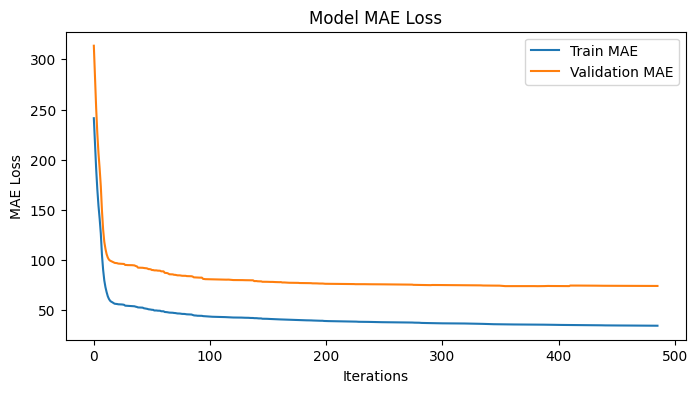

In [28]:
model.fit(
        X=X_train,
        y=y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
    )

evaluate_model(model)

In [29]:
X_val.to_csv('test.csv', index=False)

In [30]:
model.predict(X_val)

array([3.7776716e+00, 6.2695374e+02, 1.4012985e-45, ..., 3.1180046e+01,
       1.4012985e-45, 1.8294345e+02], dtype=float32)

In [31]:
model.save_model("xgboost_model.json")  # Salva no formato JSON